In [1]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import numpy as np

<AxesSubplot: >

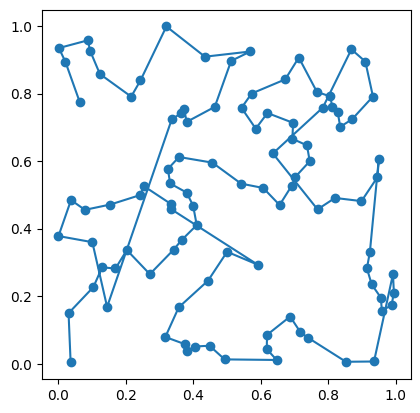

In [2]:
# Hamiltonian path
def sort_points(points):
    center = gpd.GeoSeries(points).unary_union.envelope.centroid
    points = points.to_list()
    start_point = max(points, key=lambda point: point.distance(center))
    sorted_points = [start_point]
    points.remove(start_point)

    while len(points) > 0:
        last_point = sorted_points[-1]
        nearest_point = min(points, key=lambda point: point.distance(last_point))
        points.remove(nearest_point)
        sorted_points.append(nearest_point)
    return gpd.GeoSeries(sorted_points)

points = gpd.GeoSeries([Point(x, y) for x, y in zip(np.random.rand(100), np.random.rand(100))])
sorted_points = sort_points(points)
ax = gpd.GeoSeries(LineString(sorted_points)).plot()
sorted_points.plot(ax=ax)

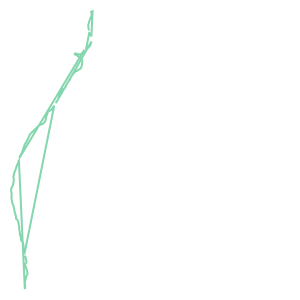

In [3]:
df = gpd.read_file("Shapefiles/CapeEgmont_TransectLines.shp")
LineString(df.centroid)

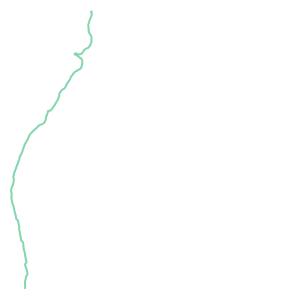

In [4]:
sorted_points = sort_points(df.centroid)
LineString(sorted_points)